In [ ]:
!pip install numpy
!pip install scikit-surprise #installs dependencies to runtime for you
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from surprise import Dataset
from surprise import Reader

from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise.model_selection import KFold

from surprise import SVD
from surprise import BaselineOnly
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNBaseline
from surprise import SVD
from surprise import SVDpp
from surprise import SlopeOne
from surprise import CoClustering
from surprise import KNNWithZScore

import matplotlib.pyplot as plt


import random


     |████████████████████████████████| 11.8MB 10.7MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1618286 sha256=604cb929005472a73c7c06e6eda3291c9a4e6bfa53f022752716986c875da5bd
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


# New Section

In [ ]:
# data structure used to handle data in models
class Node:
    def __init__(self,ID,data):
        self.id=ID
        self.data=data

class ArrayList:
    def __init__(self):
        self.inArray = [Node(None,None) for i in range(10)]
        self.count = 0
        
    def get(self, i):
        self._checkBounds(i,self.count)
        return self.inArray[i]

    def set(self, i, e):
        self._checkBounds(i,self.count)
        self.inArray[i] = e

    def length(self):
        return self.count

    def append(self, ID,data):
        self.inArray[self.count] = Node(ID,data)
        self.count += 1
        if len(self.inArray) == self.count:
            self._resizeUp()

    def insert(self, i, e):
        self._checkBounds(i,self.count)
        for j in range(self.count,i,-1):
            self.inArray[j] = self.inArray[j-1]
        self.inArray[i] = e
        self.count += 1
        if len(self.inArray) == self.count:
            self._resizeUp()
    
    def remove(self, i):
        self._checkBounds(i,self.count)
        self.count -= 1
        val = self.inArray[i]
        for j in range(i,self.count+1):
            self.inArray[j] = self.inArray[j+1]
        return val

    def _resizeUp(self):
        newArray = [0 for i in range(2*len(self.inArray))]
        for j in range(len(self.inArray)):
            newArray[j] = self.inArray[j]
        self.inArray = newArray
        
    def _checkBounds(self, i, hi):  # checks whether i is in [0,hi]
        if i < 0 or i > hi:
            raise Exception("index "+str(i)+" out of bounds!")
    def appendAll(self, A):
        for i in range(len(A)):
            self.append(A[i])
    def removeVal(self, e):
        for i in range(self.count):
            if self.inArray[i].ID == e:
                self.remove(i)
                return True
        return False
    def clone(self):
        copy=ArrayList()
        for i in range(self.count):
            copy.append(self.inArray[i])
        
        
        return copy
    def toArray(self):
        array = [self.inArray[i] for i in range(self.count)]
        #array = self.inArray[0:self.count]
        return array
    def sort(self):
            
        for i in range(self.count):
            v=self.inArray[i]
            hi=i
            for j in range(hi-1,-1,-1):
                if v.data < self.inArray[j].data:
                    self.inArray[j+1]=self.inArray[j]
                    
                else:
                    self.inArray[j+1]=v
                    break
                if j == 0:
                    
                    self.inArray[0]=v

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity ma

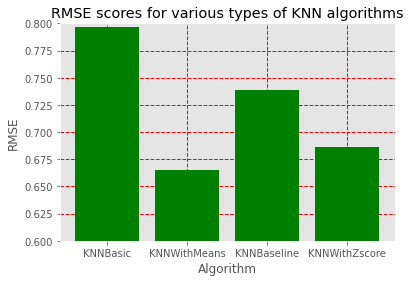

In [ ]:
### First we compare all knn models

ratings= pd.read_csv('/content/rating_final.csv')
ratings_dict={"userID":list(ratings.userID),"placeID":list(ratings.placeID),"rating":list(ratings.rating)}
df = pd.DataFrame(ratings_dict)
reader = Reader(rating_scale=(0, 2))
data = Dataset.load_from_df(df[["userID", "placeID", "rating"]], reader)
my_seed = 0 #stops rmse from changing, no randomisation
random.seed(my_seed)
np.random.seed(my_seed)



algoKnnB = KNNBasic()
algoKnnM = KNNWithMeans()
algoKnnBaseline = KNNBaseline()
algoKnnWithZScore= KNNWithZScore()
#algoSVD = SVD()
#algoSVDpp = SVDpp()
#algoSlope = SlopeOne()
#algoCluster = CoClustering()
algorithms=[["KNNBasic",algoKnnB],["KNNWithMeans",algoKnnM], ["KNNBaseline",algoKnnBaseline],["KNNWithZscore",algoKnnWithZScore] ]
result=ArrayList()
for i in algorithms:
    out=cross_validate(i[1], data, measures=['RMSE'], cv=5, verbose=False)
    mean_rmse = '{:.3f}'.format(np.mean(out['test_rmse']))
    result.append(i[0],mean_rmse)
xaxis=[]
yaxis=[]
for i in range(result.count):
    print(result.inArray[i].id,": ", result.inArray[i].data)
    xaxis.append(result.inArray[i].id)
    yaxis.append(float(result.inArray[i].data))

plt.style.use('ggplot')

x_pos = [i for i in range(0,len(xaxis))]

plt.bar(xaxis, yaxis, color='green')
plt.xlabel("Algorithm")
plt.ylabel("RMSE")
plt.title("RMSE scores for various types of KNN algorithms")
plt.ylim(0.6,0.8)
plt.grid(color='r', linestyle='--', linewidth=1)
#plt.xticks(x_pos, xaxis)



# New Section

In [ ]:
### Then we fine tune the best one
sim_options = {'name': ["cosine","msd",'pearson_baseline'],
                "min_support": [2,3,4,5,6,7,8,9,10],
               'user_based': [False, True]  # compute  similarities between items
               }
param_grid = {"sim_options":sim_options}
gs=GridSearchCV(KNNWithMeans, param_grid, measures=['rmse', 'mae'], cv=5)
my_seed = 0
random.seed(my_seed)
np.random.seed(my_seed)
gs.fit(data) #training algo

# best RMSE score
print(gs.best_score['rmse'])
print(gs.best_score['mae'])
options=gs.param_combinations




# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

/usr/local/lib/python3.6/dist-packages/surprise/prediction_algorithms/algo_base.py:249: RuntimeWarning: invalid value encountered in double_scalars
  sim = construction_func[name](*args)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

In [ ]:
##### The final algorithm using cross validation
ratings= pd.read_csv('/content/rating_final.csv')
ratings_dict={"userID":list(ratings.userID),"placeID":list(ratings.placeID),"rating":list(ratings.rating)}
df = pd.DataFrame(ratings_dict)
reader = Reader(rating_scale=(0, 2))
data = Dataset.load_from_df(df[["userID", "placeID", "rating"]], reader)

my_seed = 0
random.seed(my_seed)
np.random.seed(my_seed)#ensures that for test purposes we get the same result each time

# parameters for model
sim_options = {
    "name": "cosine",
    "user_based": True,  # Compute  similarities between users
    "min_support":9, #this was tuned to lower rmse
}
# define a cross-validation iterator
kf = KFold(n_splits=5)
algo = KNNWithMeans(sim_options=sim_options)





out=cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)
mean_rmse = '{:.3f}'.format(np.mean(out['test_rmse']))


places = list(df['placeID'].unique())
ordered=ArrayList()
for i in places:
    for trainset, testset in kf.split(data):

    # train and test algorithm.
        algo.fit(trainset)
   
        prediction = algo.predict('U1038', i, verbose=False)
        
    
    ordered.append(i,prediction.est)
ordered.sort()
#for i in range(ordered.count):
    #print(ordered.inArray[i].data," ",ordered.inArray[i].id)
highest=ordered.inArray[ordered.count-5:ordered.count]

place= pd.read_csv('/content/geoplaces2.csv')

placedf=pd.DataFrame({"placeID": list(place.placeID),"name":list(place.name)})
count=0                               #mapping the place id's to their names

for i in range(len(highest)-1,-1,-1):
    count+=1
    name=list(place[place["placeID"].unique() == highest[i].id]['name'])
    print(count,": ",name[0])

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

/usr/local/lib/python3.6/dist-packages/surprise/prediction_algorithms/algo_base.py:249: RuntimeWarning: invalid value encountered in double_scalars
  sim = construction_func[name](*args)


Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computi

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine simila

/usr/local/lib/python3.6/dist-packages/surprise/prediction_algorithms/algo_base.py:249: RuntimeWarning: invalid value encountered in double_scalars
  sim = construction_func[name](*args)


Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computi

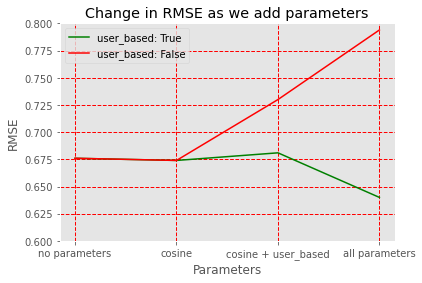

In [ ]:
## Final algorithm with visualisation of adding parameters and final rmse with all parameters

ratings= pd.read_csv('/content/rating_final.csv')
ratings_dict={"userID":list(ratings.userID),"placeID":list(ratings.placeID),"rating":list(ratings.rating)}
df = pd.DataFrame(ratings_dict)
reader = Reader(rating_scale=(0, 2))
data = Dataset.load_from_df(df[["userID", "placeID", "rating"]], reader)

my_seed = 0
random.seed(my_seed)
np.random.seed(my_seed)#ensures that for test purposes we get the same result each time

results=ArrayList() #store results for final algorithm as we add each parameter
resultsCompare= ArrayList() #store results for algorithm that is item based instead of user based for illustrattion purposes

# no parameters
kf = KFold(n_splits=5)
algo = KNNWithMeans()
out=cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)
mean_rmse = '{:.3f}'.format(np.mean(out['test_rmse']))
results.append("no parameters", mean_rmse)
resultsCompare.append("no parameters", mean_rmse)

# only cosine
sim_options = {
    "name": "cosine", 
}

kf = KFold(n_splits=5)
algo = KNNWithMeans(sim_options=sim_options)
out=cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)
mean_rmse = '{:.3f}'.format(np.mean(out['test_rmse']))
results.append("cosine", mean_rmse)
resultsCompare.append("cosine", mean_rmse)

# cosine and user based=true
sim_options = {
    "name": "cosine",
    "user_based": True,  # Compute  similarities between users
    
}

kf = KFold(n_splits=5)
algo = KNNWithMeans(sim_options=sim_options)
out=cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)
mean_rmse = '{:.3f}'.format(np.mean(out['test_rmse']))
results.append("cosine + user_based", mean_rmse)

#illustrate difference between user based being true and false
sim_options = {
    "name": "cosine",
    "user_based": False,  # Compute  similarities between users
    
}

kf = KFold(n_splits=5)
algo = KNNWithMeans(sim_options=sim_options)
out=cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)
mean_rmse = '{:.3f}'.format(np.mean(out['test_rmse']))
resultsCompare.append("cosine + item_based", mean_rmse)

# all parameters (item based version)
sim_options = {
    "name": "cosine",
    "user_based": False,  # Compute  similarities between users
    "min_support":9, #this was tuned to lower rmse
}

kf = KFold(n_splits=5)
algo = KNNWithMeans(sim_options=sim_options)
out=cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)
mean_rmse = '{:.3f}'.format(np.mean(out['test_rmse']))
resultsCompare.append("All parameters", mean_rmse)

# all parameters (user based, FINAL algorithm)
sim_options = {
    "name": "cosine",
    "user_based": True,  # Compute  similarities between users
    "min_support":9, #this was tuned to lower rmse
}

kf = KFold(n_splits=5)
algo = KNNWithMeans(sim_options=sim_options)
out=cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)
mean_rmse = '{:.3f}'.format(np.mean(out['test_rmse']))
results.append("all parameters", mean_rmse)
xaxis=[]
yaxis=[]
#for comparison
yaxisC=[]
for i in range(results.count):
  print(results.inArray[i].id, results.inArray[i].data )
  xaxis.append(results.inArray[i].id)
  yaxis.append(float(results.inArray[i].data))
print("\n")
#for second plot to compare
for i in range(resultsCompare.count):
  print(resultsCompare.inArray[i].id, resultsCompare.inArray[i].data )
  
  yaxisC.append(float(resultsCompare.inArray[i].data))
print("\n")
print("Final RMSE for algorithm:",results.inArray[3].data)
plt.style.use('ggplot')

x_pos = [i for i in range(0,len(xaxis))]

user_based_true, =plt.plot(xaxis, yaxis, color='green', label="user_based: True")
user_based_false, =plt.plot(xaxis, yaxisC, color='red', label="user_based: False")
plt.legend(handles=[user_based_true, user_based_false])
plt.xlabel("Parameters")
plt.ylabel("RMSE")
plt.title("Change in RMSE as we add parameters")
plt.ylim(0.6,0.8)
plt.grid(color='r', linestyle='--', linewidth=1)